# Pandas

[Pandas](https://pandas.pydata.org/) is a Python package for tabular data.

You may need to install `pandas` first, as well as `seaborn`

```bash
(pycourse) $ conda install pandas seaborn
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.__version__

'1.1.3'

## Overview

Pandas provides a `DataFrame` object, which is used to hold tables of data (the name `DataFrame` comes from a [similar object in R](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/data.frame)).  The primary difference compared to a NumPy `ndarray` is that you can easily handle different data types in each column.

### Difference between a DataFrame and NumPy Array

Pandas DataFrames and NumPy arrays both have similarities to Python lists.  
* Numpy arrays are designed to contain data of one type (e.g. Int, Float, ...)
* DataFrames can contain different types of data (Int, Float, String, ...)
    * Usually each column has the same type
    
    
Both arrays and DataFrames are optimized for storage/performance beyond Python lists

Pandas is also powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

### Key Features

* File I/O - integrations with multiple file formats
* Working with missing data (.dropna(), pd.isnull())
* Normal table operations: merging and joining, groupby functionality, reshaping via stack, and pivot_tables,
* Time series-specific functionality:
    * date range generation and frequency conversion, moving window statistics/regressions, date shifting and lagging, etc.
* Built in Matplotlib integration

### Other Strengths

* Strong community, support, and documentation
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

### Python/Pandas vs. R

* R is a language dedicated to statistics. Python is a general-purpose language with statistics modules.
* R has more statistical analysis features than Python, and specialized syntaxes.

However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

### Objects and Basic Creation

| Name | Dimensions | Description  |
| ------:| -----------:|----------|
| ```pd.Series``` | 1 | 1D labeled homogeneously-typed array |
| ```pd.DataFrame```  | 2| General 2D labeled, size-mutable tabular structure |
| ```pd.Panel``` | 3|  General 3D labeled, also size-mutable array |

### Get Started
We'll load the Titanic data set, which is part of seaborn's example data.  It contains information about 891 passengers on the infamous [Titanic](https://en.wikipedia.org/wiki/Titanic)

See the [Pandas tutorial on reading/writing data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html) for more information.

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
df = titanic
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


we see that there are a variety of columns.  Some contain numeric values, some contain strings, some contain booleans, etc.

If you want to access a particular column, you can create a `Series` using the column title.

In [3]:
ages = df["age"]
ages

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

column titles are also treated as object attributes:

In [4]:
ages = df.age
ages

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

Pandas `DataFrames` and `Series` have a variety of built-in methods to examine data

In [5]:
print(ages.max(), ages.min(), ages.mean())

80.0 0.42 29.69911764705882


You can display a variety of statistics using `describe()`.  Note that `NaN` values are simply ignored.

In [6]:
ages.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

depending on the type of data held in the series, `describe` has different functionality.

In [7]:
df['sex'].describe()

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

You can find some more discussion in the Pandas tutorial [here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html)

### Selecting Subsets of DataFrames

You can select multiple columns

In [8]:
df2 = df[["age", "survived"]]
df2

,age,survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


If you want to select certain rows, using some sort of criteria, you can create a series of booleans

In [9]:
mask = df2['age'] > 30
df2[mask]

,age,survived
1,38.0,1
3,35.0,1
4,35.0,0
6,54.0,0
11,58.0,1
...,...,...
873,47.0,0
879,56.0,1
881,33.0,0
885,39.0,0


We see that we only have 305 rows now

If you just want to access specific rows, you can use `iloc`

In [10]:
df.iloc[:4]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


### Aside: Attributes

Recall that you can access columns of a `DataFrame` using attributes:

In [11]:
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

You have typically defined attributes using syntax like

In [12]:
class MyDF():
    def __init__(self, **kwargs):
        self.is_df = True
        
df2 = MyDF()
df2.is_df

True

However, there are other options for defining attibutes.

Object attributes are accessed using a Python dictionary.  If you want to store attributes manually, you can put these attributes into the object dictionary using `__dict__`:

In [13]:
import numpy as np
class MyDF():
    def __init__(self, **kwargs):
        """
        Store all keyword arguments as attributes
        """
        for k, v in kwargs.items():
            self.__dict__[k] = v
            
        self.is_df = True
        
    
df2 = MyDF(a=1, b=np.ones(3))

In [14]:
print(df2.a)
print(df2.b)

1
[1. 1. 1.]


You can also define methods so they behave like attributes as well using the `@property` decorator

In [15]:
class MyDF():
    def __init__(self, **kwargs):
        """
        Store all keyword arguments as attributes
        """
        for k, v in kwargs.items():
            self.__dict__[k] = v
            
        self.is_df = True
        
           
    @property
    def nitems(self):
        return len(self.__dict__)
    
    
    @property
    def get_number(self):
        return np.random.rand()


    
df2 = MyDF(a=1, b=np.ones(3))
df2.nitems

3

## Missing data 

In data analysis, knowing how to properly fill in missing data is very important, sometimes we don't want to just ignore them, especially when the observational numbers are small. There are various ways to do it such as filling with the mean, K-Nearest Neighbors (KNN) methods and so on.

## Exercise

Here, as an exercise, suppose we are trying to replace missing values in age column as its mean from titanic dataset.

In [16]:
MissDataPra = titanic
MissDataPra

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
## Your code here

In [18]:
# Solution 
ages = MissDataPra["age"]
ageMean = ages.mean()
MissDataPra["age"] = ages.fillna(ageMean)
MissDataPra["age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

## Series

- a `Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
- Basic method to create a series: 
` s = pd.Series(data, index = index) `
- Data can be many things:
    * A Python Dictionary
    * An ndarray (or reg. list)
    * A scalar 
- The passed index is a list of axis labels (which varies on what data is)

Think "Series = Vector + labels"

In [19]:
first_series = pd.Series([2**i for i in range(7)])
print(type(first_series))
print(first_series)

<class 'pandas.core.series.Series'>
0     1
1     2
2     4
3     8
4    16
5    32
6    64
dtype: int64


In [20]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print('-'*50)
print(s.index)

a    0.874758
b    0.851154
c    1.871462
d   -0.504969
e    1.227308
dtype: float64
--------------------------------------------------
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [21]:
s['a']

0.8747580221049295

If Data is a dictionary, if index is passed the values in data corresponding to the labels in the index will be pulled out, otherwise an index will be constructed from the sorted keys of the dict

In [22]:
d = {'a': [0., 0], 'b': {'1':1.}, 'c': 2.}
pd.Series(d)

a      [0.0, 0]
b    {'1': 1.0}
c             2
dtype: object

You can create a series from a scalar, but need to specify indices

In [23]:
pd.Series(5, index = ['a', 'b', 'c'])

a    5
b    5
c    5
dtype: int64

You can index and slice series like you would numpy arrays/python lists

In [24]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a   -0.667701
b   -0.668479
c   -0.833650
d   -0.320418
e    2.715397
dtype: float64


In [25]:
print(s['b':'d'])

b   -0.668479
c   -0.833650
d   -0.320418
dtype: float64


In [26]:
s[s > s.mean()]

e    2.715397
dtype: float64

You can iterate over a `Series` as well

In [27]:
for idx,val in s.iteritems():
    print(idx,val)

a -0.6677005781911395
b -0.6684787778145636
c -0.8336498907290977
d -0.3204183514502792
e 2.715396793052366


or sort by index or value

In [28]:
print(s.sort_index())
print(s.sort_values())

a   -0.667701
b   -0.668479
c   -0.833650
d   -0.320418
e    2.715397
dtype: float64
c   -0.833650
b   -0.668479
a   -0.667701
d   -0.320418
e    2.715397
dtype: float64


You can also count unique values:

In [29]:
s = pd.Series([0,0,0,1,1,1,2,2,2,2])
s.value_counts()

2    4
1    3
0    3
dtype: int64

### Exercise

- Consider the series `s` of letters in a sentence.
- What is count of each letter in the sentence, output a series which is sorted by the count
- Create a list with only the top 5 common letters (not including space)

In [30]:
## Your code here

## Data Frames

- a `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.
- You can create a DataFrame from:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy array
    - A list of dictionaries
    - A Series
    - Another Dataframe
``` python
df = pd.DataFrame(data, index = index, columns = columns)
```
- ```index```/ ``` columns ``` is a list of the row/ column labels. If you pass an index and/ or columns, you are guarenteeing the index and /or column of the df. 
- If you do not pass anything in, the input will be constructed by "common sense" rules

Documentation: [**pandas.DataFrame**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### DataFrame Creation

from dictionaries:

In [31]:
end_string = "\n -------------------- \n"

# Create a dictionary of series
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']), 
     'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}
df = pd.DataFrame(d)
print(df, end = end_string)

d= {'one': {'a': 1, 'b': 2, 'c':3}, 
     'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}
# Columns are dictionary keys, indices and values obtained from series
df = pd.DataFrame(d)
# Notice how it fills the column one with NaN for d
print(df, end = end_string)

   one  two
a  1.0    0
b  2.0    1
c  3.0    2
d  NaN    3
 -------------------- 
   one  two
a  1.0    0
b  2.0    1
c  3.0    2
d  NaN    3
 -------------------- 


From dictionaries of ndarrays or lists:

In [32]:
d = {'one' : [1., 2., 3., 4], 'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


from a list of dicts:

In [33]:
data = []
for i in range(100):
    data += [ {'Column' + str(j):np.random.randint(100) for j in range(5)} ]
    # dictionary comprehension!
    
data[:5]

[{'Column0': 39, 'Column1': 74, 'Column2': 58, 'Column3': 42, 'Column4': 25},
 {'Column0': 83, 'Column1': 76, 'Column2': 50, 'Column3': 7, 'Column4': 1},
 {'Column0': 43, 'Column1': 87, 'Column2': 4, 'Column3': 53, 'Column4': 34},
 {'Column0': 55, 'Column1': 45, 'Column2': 60, 'Column3': 45, 'Column4': 25},
 {'Column0': 1, 'Column1': 5, 'Column2': 75, 'Column3': 20, 'Column4': 52}]

In [34]:
# Creation from a list of dicts
df = pd.DataFrame(data)
df.head()

,Column0,Column1,Column2,Column3,Column4
0,39,74,58,42,25
1,83,76,50,7,1
2,43,87,4,53,34
3,55,45,60,45,25
4,1,5,75,20,52


### Adding and Deleting Columns

In [35]:
# Adding and accessing columns 
d = {'one': pd.Series([1,2,3], index  = [0, 'b', 'c']), 
     'two': pd.Series(range(4), index = ['a','b', 'c', 'd'])}
df = pd.DataFrame(d)
# multiply 
df['three'] =  df['one']*df['two']
# Create a boolean flag
df['flag'] = df['one'] > 2
df

,one,two,three,flag
0,1.0,NaN,NaN,False
b,2.0,1.0,2.0,False
c,3.0,2.0,6.0,True
a,NaN,0.0,NaN,False
d,NaN,3.0,NaN,False


In [36]:
# inserting column in specified location, with values
df.insert(1, 'bar', df['one'][2:])
df

,one,bar,two,three,flag
0,1.0,NaN,NaN,NaN,False
b,2.0,NaN,1.0,2.0,False
c,3.0,3.0,2.0,6.0,True
a,NaN,NaN,0.0,NaN,False
d,NaN,NaN,3.0,NaN,False


In [37]:
# Deleting Columns  
three = df.pop('three')
df

,one,bar,two,flag
0,1.0,NaN,NaN,False
b,2.0,NaN,1.0,False
c,3.0,3.0,2.0,True
a,NaN,NaN,0.0,False
d,NaN,NaN,3.0,False


### Indexing and Selection 

4 methods ``` [], ix, iloc, loc ```

| Operation  | Syntax       | Result | 
|----|----------------------| ---------------------------|
| Select Column | df[col]   |    Series                      |
| Select Row by Label | df.loc[label] | Series  |
| Select Row by Integer Location | df.iloc[idx] |      Series                    |
| Slice rows | df[5:10]        |                        DataFrame  | 
| Select rows by boolean | df[mask]   | DataFrame        |

Note all the operations below are valid on series as well restricted to one dimension

Indexing using `[]`

- Series: selecting a label: s[label] 
- DataFrame: selection single or multiple columns: 
```python 
df['col'] or df[['col1', 'col2']]
``` 
- DataFrame: slicing the rows:
```python
df['rowlabel1': 'rowlabel2']
``` 
or 
```python 
df[boolean_mask]
```

In [38]:
# Lets create a data frame
pd.options.display.max_rows = 4
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C','D'])
df

,A,B,C,D
2000-01-01,-0.072309,0.696984,0.228349,0.635221
2000-01-02,1.271803,0.042739,1.862349,-0.684897
...,...,...,...,...
2000-01-07,-1.222614,-0.573211,1.863767,0.147656
2000-01-08,-1.102622,-1.362201,0.553438,-0.057948


In [39]:
# column  'A
df['A']

2000-01-01   -0.072309
2000-01-02    1.271803
                ...   
2000-01-07   -1.222614
2000-01-08   -1.102622
Freq: D, Name: A, Length: 8, dtype: float64

In [40]:
# all rows, columns A, B
df.loc[:,"A":"B"]

,A,B
2000-01-01,-0.072309,0.696984
2000-01-02,1.271803,0.042739
...,...,...
2000-01-07,-1.222614,-0.573211
2000-01-08,-1.102622,-1.362201


In [41]:
# multiple columns
df[['A', 'B']]

,A,B
2000-01-01,-0.072309,0.696984
2000-01-02,1.271803,0.042739
...,...,...
2000-01-07,-1.222614,-0.573211
2000-01-08,-1.102622,-1.362201


In [42]:
# slice by rows
df['2000-01-01': '2000-01-04']

,A,B,C,D
2000-01-01,-0.072309,0.696984,0.228349,0.635221
2000-01-02,1.271803,0.042739,1.862349,-0.684897
2000-01-03,0.461383,0.797899,1.195541,1.020647
2000-01-04,1.278179,-0.677812,0.254883,1.144705


In [43]:
# boolean mask 
df[df['A'] > df['B']]

,A,B,C,D
2000-01-02,1.271803,0.042739,1.862349,-0.684897
2000-01-04,1.278179,-0.677812,0.254883,1.144705
2000-01-08,-1.102622,-1.362201,0.553438,-0.057948


In [44]:
# Assign via []
df['A'] = df['B'].values
df

,A,B,C,D
2000-01-01,0.696984,0.696984,0.228349,0.635221
2000-01-02,0.042739,0.042739,1.862349,-0.684897
...,...,...,...,...
2000-01-07,-0.573211,-0.573211,1.863767,0.147656
2000-01-08,-1.362201,-1.362201,0.553438,-0.057948


Selecting by label: `.loc`

- is primarily label based, but may also be used with a boolean array.
- .loc will raise KeyError when the items are not found
- Allowed inputs:
    1. A single label 
    2. A list of labels
    3. A boolean array

In [45]:
## Selection by label .loc
df.loc['2000-01-01']

A    0.696984
B    0.696984
C    0.228349
D    0.635221
Name: 2000-01-01 00:00:00, dtype: float64

In [46]:
df.loc[:, 'A':'C']

,A,B,C
2000-01-01,0.696984,0.696984,0.228349
2000-01-02,0.042739,0.042739,1.862349
...,...,...,...
2000-01-07,-0.573211,-0.573211,1.863767
2000-01-08,-1.362201,-1.362201,0.553438


In [47]:
# Get columns for which value is greater than 0 on certain day, get all rows
df.loc[:, df.loc['2000-01-01'] > 0]

,A,B,C,D
2000-01-01,0.696984,0.696984,0.228349,0.635221
2000-01-02,0.042739,0.042739,1.862349,-0.684897
...,...,...,...,...
2000-01-07,-0.573211,-0.573211,1.863767,0.147656
2000-01-08,-1.362201,-1.362201,0.553438,-0.057948


Selecting by position: `iloc`

- The .iloc attribute is the primary access method. The following are valid input:
    - An integer
    - A list of integers
    - A slice 
    - A boolean array

In [48]:
df1 = pd.DataFrame(np.random.randn(6,4), 
                   index=list(range(0,12,2)), columns=list(range(0,12,3)))

df1

,0,3,6,9
0,0.677997,-1.061533,-0.361333,2.126086
2,2.142686,-0.464907,0.394591,-0.348323
...,...,...,...,...
8,-0.290340,0.125588,0.563182,-1.053349
10,-0.592520,-0.179628,0.404970,0.663626


In [49]:
# rows 0-2
df1.iloc[:3]

,0,3,6,9
0,0.677997,-1.061533,-0.361333,2.126086
2,2.142686,-0.464907,0.394591,-0.348323
4,0.145852,-1.449649,-0.479868,-0.479109


In [50]:
#  rows 1:4  and columns 2 : 4
df1.iloc[1:5, 2:4]

,6,9
2,0.394591,-0.348323
4,-0.479868,-0.479109
6,1.473149,1.348503
8,0.563182,-1.053349


In [51]:
# select via integer list
df1.iloc[[1,3,5], [1,3]]

,3,9
2,-0.464907,-0.348323
6,1.048776,1.348503
10,-0.179628,0.663626


In [52]:
# selecting via integer mask 
boolean_mask = df1.iloc[:, 1] > 0.0
df1.iloc[boolean_mask.values,1]

6    1.048776
8    0.125588
Name: 3, dtype: float64

### Exercise

Given the dataframe `df` below, find the following
- Last two rows of columns A and D
- Last three rows such which statisfy that column A > Column B

In [53]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C','D'])
df

,A,B,C,D
2000-01-01,0.859972,0.655668,0.047926,-0.599810
2000-01-02,-0.867246,1.966589,0.667969,1.097139
...,...,...,...,...
2000-01-07,-0.392700,-0.772000,-0.385468,-2.279803
2000-01-08,-1.083808,1.227479,0.538900,0.651885


In [54]:
## Your code here

In [55]:
# Solution: Last two rows of columns A and D
df.iloc[[6,7], [0,3]]

,A,D
2000-01-07,-0.392700,-2.279803
2000-01-08,-1.083808,0.651885


In [56]:
# Solution: Last three rows such which statisfy that column A > Column B
last3rows = df.iloc[5:8,]  # last three rows 
print(last3rows['A'] > last3rows['B']) # The boolean statement return true if column A > Column B. 

2000-01-06     True
2000-01-07     True
2000-01-08    False
Freq: D, dtype: bool


## Plotting

`DataFrames` and `Series` have a variety of built-in plotting methods:

Let's take a look at the [Iris data set](https://archive.ics.uci.edu/ml/datasets/Iris)

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [57]:
iris = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names=["sepal length", "sepal width", "petal length", "petal width", "class"]
)
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


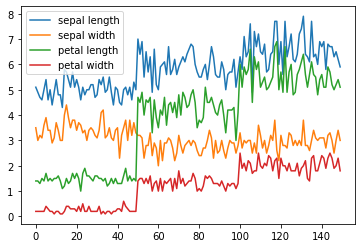

In [58]:
iris.plot()
plt.show()

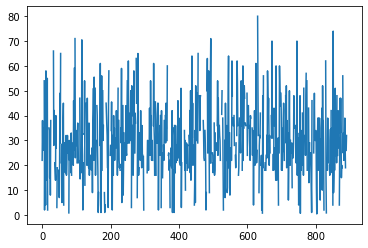

In [59]:
# Titanic DataSet
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

df.age.plot()
plt.show()

`plot` just plots the value by index, and doesn't make a lot of sense unless the index means something (like time).  In this case, a histogram makes more sense:

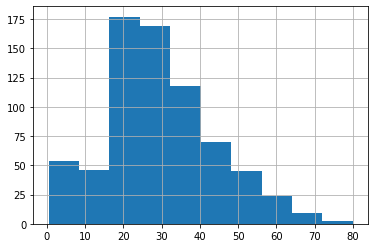

In [60]:
df.age.hist()
plt.show()

we can also create scatter plots of two columns

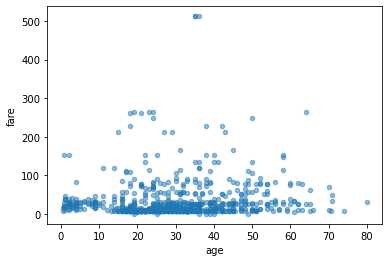

In [61]:
df.plot.scatter(x='age', y='fare', alpha=0.5)
plt.show()

You can also create box plots

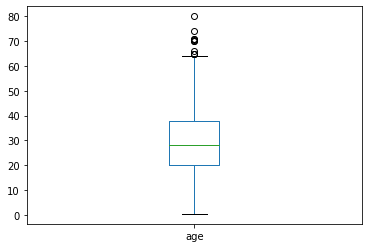

In [62]:
df.age.plot.box()
plt.show()

## Summary Statistics

Basic summary statistics are built into Pandas.  These are easy to compute on columns/series

In [63]:
print(df.age.mean())
print(df.age.median())

29.69911764705882
28.0


You can also compute statistics on multiple (or all columns)

In [64]:
df.mean()

survived      0.383838
pclass        2.308642
                ...   
adult_male    0.602694
alone         0.602694
Length: 8, dtype: float64

In [65]:
df[['age', 'fare']].mean()

age     29.699118
fare    32.204208
dtype: float64

You can also compute statistics grouping by category

In [66]:
df[['age', 'sex']].groupby('sex').mean()

,age
sex,
female,27.915709
male,30.726645


In [67]:
df.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


You can count how many records are in each category for categorical variables

In [68]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [69]:
df.groupby('sex')['pclass'].value_counts()

sex     pclass
female  3         144
        1          94
                 ... 
male    1         122
        2         108
Name: pclass, Length: 6, dtype: int64

## Table Manipulation

You can sort tables by a column value:

In [70]:
df.sort_values(by='age')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


You can also sort by a primary key and secondary key

In [71]:
df.sort_values(by=['pclass', 'age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
297,0,1,female,2.00,1,2,151.5500,S,First,child,False,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


### Groups

pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:

Syntax:  
- ``` groups = df.groupby(key) ```
- ``` groups = df.groupby(key, axis = 1) ```
- ``` groups = df.groupby([key1, key2], axis = 1) ```
    
    
The group by concept is that we want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets

This idea is referred to as the "split-apply-combine" operation:
- Split the data into groups based on some criteria
- Apply a function to each group independently
- Combine the results 

![image](https://i.stack.imgur.com/sgCn1.jpg)

In [72]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
...,...,...
7,B,15
8,C,20


In [73]:
df.groupby('key')

In [74]:
sums = df.groupby('key').agg(np.sum)
sums

,data
key,
A,15
B,30
C,45


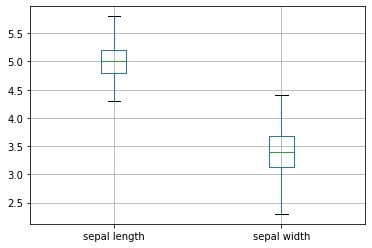

In [75]:
ax = iris.groupby('class') \
         .get_group('Iris-setosa') \
         .boxplot(column=["sepal length","sepal width"], return_type='axes')

### Pivot Tables

Say you want the mean age for each sex grouped by class.  We can create a [pivot table](https://pandas.pydata.org/docs/getting_started/intro_tutorials/07_reshape_table_layout.html#pivot-table) to display the data:

In [76]:
titanic.pivot_table(values="age", index="sex",
                columns="pclass", aggfunc="mean")

pclass,1,2,3
sex,,,
female,34.141405,28.748661,24.068493
male,39.287717,30.653908,27.372153


you can change the aggregation function to compute other statistics

In [77]:
titanic.pivot_table(values="age", index="sex",
                columns="pclass", aggfunc="median")

pclass,1,2,3
sex,,,
female,32.5,28.500000,28.000000
male,36.0,29.699118,29.699118


### Merging DataFrames

- Pandas has full-featured, very high performance, in memory join operations that are very similar to SQL and R 

- The documentation is https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

- Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects: 
```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)
```

In [78]:
# Example of merge
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [4, 2]})
right = pd.DataFrame({'key': ['bar', 'zoo'], 'rval': [4, 5]})

print("left: ",left,"right: ",right, sep=end_string)

left: 
 -------------------- 
   key  lval
0  foo     4
1  bar     2
 -------------------- 
right: 
 -------------------- 
   key  rval
0  bar     4
1  zoo     5


In [79]:
merged = pd.merge(left, right, how="inner")
print(merged)

   key  lval  rval
0  bar     2     4


In [80]:
merged = pd.merge(left, right, how="outer")
print(merged)

   key  lval  rval
0  foo   4.0   NaN
1  bar   2.0   4.0
2  zoo   NaN   5.0


In [81]:
merged = pd.merge(left, right, how="left")
print(merged)

   key  lval  rval
0  foo     4   NaN
1  bar     2   4.0


In [82]:
merged = pd.merge(left, right, how="right")
print(merged)

   key  lval  rval
0  bar   2.0     4
1  zoo   NaN     5


### Functions

 Row or Column-wise Function Application: Applies function along input axis of DataFrame
```python 
df.apply(func, axis = 0)
``` 

Elementwise: apply the function to every element in the df 
```python 
df.applymap(func)
``` 

- Note, ``` applymap ``` is equivalent to the ``` map ``` function on lists. 
- Note, ``` Series ``` objects support ``` .map ``` instead of ``` applymap ```

In [83]:
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
df1

,a,b,c,d
0,1.783494,1.265981,0.058911,0.487110
2,2.406920,0.886153,-0.437097,0.417188
...,...,...,...,...
8,-1.094024,-1.208597,0.783410,1.327431
10,0.102170,-2.641260,0.441603,0.349093


In [84]:
# Apply to each column
df1.apply(np.mean)

a    0.425472
b    0.251235
c    0.039380
d    0.737159
dtype: float64

In [85]:
# Apply to each row
df1.apply(np.mean, axis = 1)

0     0.898874
2     0.818291
        ...   
8    -0.047945
10   -0.437098
Length: 6, dtype: float64

In [86]:
# # Use lambda functions  to normalize columns
df1.apply(lambda x: (x - x.mean())/ x.std(), axis = 0)


,a,b,c,d
0,0.980070,0.574762,0.036721,-0.315195
2,1.429990,0.359624,-0.895844,-0.403334
...,...,...,...,...
8,-1.096605,-0.826863,1.398883,0.744060
10,-0.233324,-1.638338,0.756238,-0.489171


In [87]:
df1.applymap(np.exp)

,a,b,c,d
0,5.950614,3.546571,1.060680,1.627606
2,11.099722,2.425780,0.645909,1.517689
...,...,...,...,...
8,0.334866,0.298616,2.188924,3.771342
10,1.107572,0.071271,1.555199,1.417781


**Bibliography** - this notebook used content from some of the following sources:
* [CME 193 (Stanford)](https://github.com/icme/cme193)
* [Pandas Tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)